In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import random
import seaborn as sns

# Exploratory data analysis

Load in the cleaned data

In [2]:
df=pd.read_csv('cleaned data.csv')
df=df.drop(df.columns[0], axis=1)


In [3]:
df

,username,reviews
0,Doreen Meyer,book profound beautifully written--so beautifu...
1,Henry Cohen,bobbitt's short tight argument machiavelli's p...
2,kevin l mellyn,great book! places machiavelli context complet...
3,G Ranger,"recently toured rome italy, viewed many splend..."
4,Stephen N. Greenleaf,international lawyer historian philip bobbitt ...
5,David Shulman,excellent brief study draws attention legal co...
6,Amazon Customer,great analysis
7,eddie,compact work succeeds presenting machiavelli's...
8,Agam Bellum,"amazing book, rare thing, adding new idea mark..."
9,Susan Wolf,"errors nothing machiavelli, constitute gratuit..."


#### Let's try drawing some insights based on the important words by reviewers.

In [8]:
df['reviews'].str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9,...,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462
0,book,profound,beautifully,written--so,beautifully,periodically,stopped,tracks,forced,go,...,None,None,None,None,None,None,None,None,None,None
1,bobbitt's,short,tight,argument,machiavelli's,prince,really,part,wider,project,...,None,None,None,None,None,None,None,None,None,None
2,great,book!,places,machiavelli,context,completely,different,light,typically,represented,...,None,None,None,None,None,None,None,None,None,None
3,recently,toured,rome,"italy,",viewed,many,splendor,italian,renaissance.,works,...,None,None,None,None,None,None,None,None,None,None
4,international,lawyer,historian,philip,bobbitt,offers,us,fundamental,interpretation,niccolo,...,None,None,None,None,None,None,None,None,None,None
5,excellent,brief,study,draws,attention,legal,constitutional,aspects,machiavelli’s,thought,...,None,None,None,None,None,None,None,None,None,None
6,great,analysis,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,compact,work,succeeds,presenting,machiavelli's,"""the","prince""",new,authoritative,light.,...,None,None,None,None,None,None,None,None,None,None
8,amazing,"book,",rare,"thing,",adding,new,idea,marketplace,ideas.,little,...,None,None,None,None,None,None,None,None,None,None
9,errors,nothing,"machiavelli,",constitute,gratuitous,comments,suggest,author,stick,areas,...,None,None,None,None,None,None,None,None,None,None


In [9]:
df['reviews'].str.split(expand=True).stack()

0   0             book
    1         profound
    2      beautifully
    3      written--so
    4      beautifully
              ...     
29  21          state.
    22    recommended.
30  0            320.1
    1            b6633
    2             2013
Length: 5556, dtype: object

In [6]:
word_frequency=pd.Series(df['reviews'].str.split(expand=True).stack().value_counts())
word_frequency

machiavelli    95
bobbitt        75
state          61
new            50
one            35
               ..
pp.             1
condition       1
au              1
defines         1
helpful).       1
Length: 2710, dtype: int64

In [10]:
word_frequency[:100]

machiavelli    95
bobbitt        75
state          61
new            50
one            35
               ..
current         7
civil           7
hope            7
law             7
though          7
Length: 100, dtype: int64

## Plotting most common words used by reviwers.

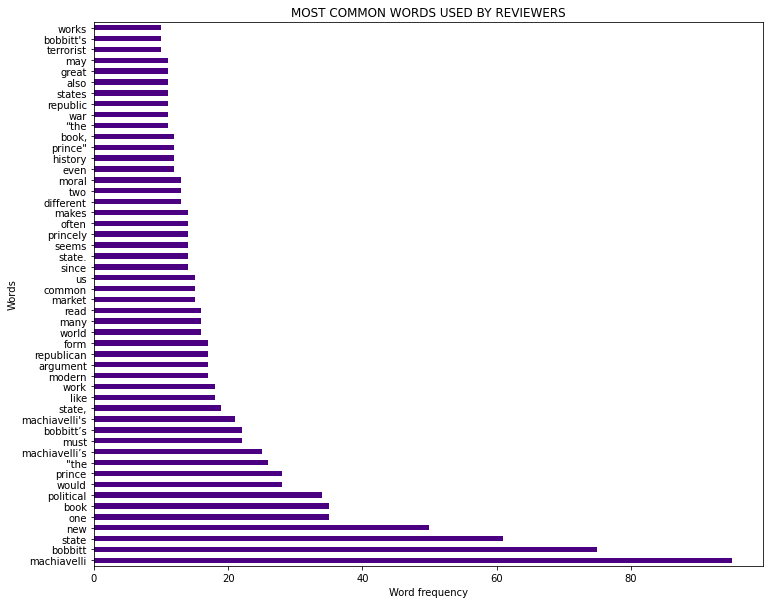

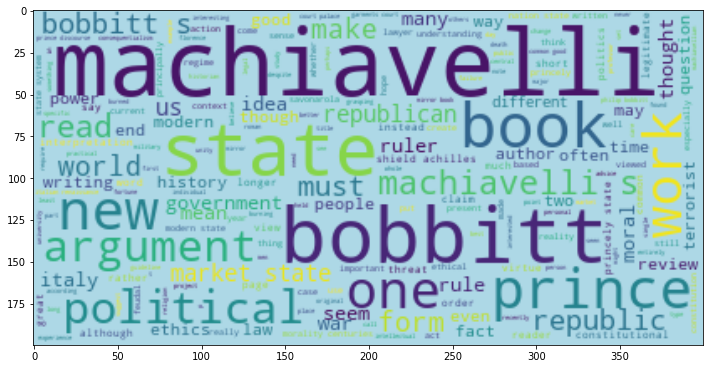

In [13]:
##plotting words
plt.figure(figsize=(12,10))
word_frequency[:50].plot(kind='barh',color='indigo')
plt.xlabel('Word frequency')
plt.ylabel('Words')
plt.title('MOST COMMON WORDS USED BY REVIEWERS')


##making wordcloud
temp_review=''.join(df['reviews'])
plt.figure(figsize=(12,10))
wordcloud=WordCloud(background_color='lightblue').generate(temp_review)
plt.imshow(wordcloud,interpolation='bilinear')

### Findings

> -**'market'**

    This is a very impactful word since Phillip Bobbit elegantly describesand explains how Machiavelli's ideas resonates with the current era because we are in the cusp of a new constitutional order in which we are changing from a nation state to a market state. He also relates how Machiavelli saw the change in constitutional order in Italy which is indeed happening to the world in general right now.


     
     
>    - **'republican' and 'republic**


     These 2 words also indicates how readers of this book really grasp the context behind the 'The Prince'. Phillip Bobbit manages to deliver this contextual message behind Machiavelli's work elegantly since these are important words which are most commonly used words by reviewers. Not only that, but in my opinion the only one message from this book which is very profound is the constituional context behind Machiavelli's doctrine. 
     
     

> - **'moral'**


        This word is one of the most commonly used words by reviewers. This carries a very meaningful interpretation of this book since Machiavelli's The Prince is hugely misinterpreted as a diabolical,immoral and unscrupluous guide on how to be a leader.Phillip Bobbit then disects the moral aspects of The Prince which is widely misinterpreted by many scholars without knowing the constitutional context of 'The Prince'.
     

# Sentiment analysis

We will be using vader's model to classify reviews into positive,negative and neutral

In [19]:
vader=SentimentIntensityAnalyzer()

In [21]:
sentiment=[]


for row in df['reviews']:
    vc=vader.polarity_scores(row)
    sentiment.append(vc)

In [22]:
sentiment=pd.DataFrame(sentiment)

Append sentiment score to their respective review

In [24]:
df=pd.concat([df,sentiment],axis=1)
df

,username,reviews,neg,neu,pos,compound
0,Doreen Meyer,book profound beautifully written--so beautifu...,0.090,0.716,0.194,0.9061
1,Henry Cohen,bobbitt's short tight argument machiavelli's p...,0.074,0.735,0.190,0.9574
2,kevin l mellyn,great book! places machiavelli context complet...,0.000,0.602,0.398,0.9612
3,G Ranger,"recently toured rome italy, viewed many splend...",0.150,0.689,0.161,0.3392
4,Stephen N. Greenleaf,international lawyer historian philip bobbitt ...,0.063,0.839,0.098,0.7964
5,David Shulman,excellent brief study draws attention legal co...,0.052,0.704,0.244,0.6249
6,Amazon Customer,great analysis,0.000,0.196,0.804,0.6249
7,eddie,compact work succeeds presenting machiavelli's...,0.055,0.737,0.208,0.8957
8,Agam Bellum,"amazing book, rare thing, adding new idea mark...",0.034,0.787,0.179,0.6983
9,Susan Wolf,"errors nothing machiavelli, constitute gratuit...",0.162,0.786,0.052,-0.9862


Label sentiment scores and classify them into sentiment

In [25]:
df['sentiment']=df['compound'].apply(lambda x: 'positive' if x>0.05 else ('neutral' if -0.05<x<0.05 else 'negative'))

We can see here most of reviwers have positive feedback about this book.

In [27]:
test=pd.Series(df['sentiment'].value_counts())
test

positive    24
negative     4
neutral      3
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x19c306e2100>,
 [Text(-0.7230235168702864, -0.8422214637804731, 'postive'),
  Text(0.9335087746261688, 0.5818602647508669, 'negative'),
  Text(0.32929962229357207, 1.049553123361229, 'neutral')],
 [Text(-0.3973372480097971, -0.4628424260415212, '77.4%'),
  Text(0.5091866043415466, 0.31737832622774553, '12.9%'),
  Text(0.17961797579649386, 0.5724835218333976, '9.7%')])

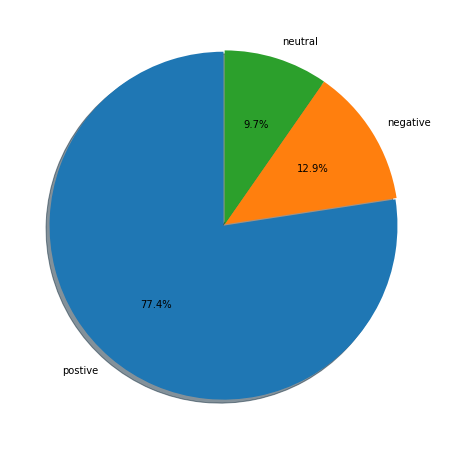

In [28]:
labels ='postive','negative','neutral'
explode = (0.01, 0, 0)

fig,ax=plt.subplots(figsize=(12,8))
ax.pie(test,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode)

> **We can precisely say more than half of the readers are satisfied with the book and had a positive view of this book**

### Let's get some insights from the reviews based on its sentiment.

In [29]:
postive_reviews=df[df['sentiment']=='positive']
negative_reviews=df[df['sentiment']=='negative']
neutral_reviews=df[df['sentiment']=='neutral']

In [30]:
colour=['green','yellow','red']

labels=['Positive reviews','Negative reviews','Neutral reviews']

def words_frequency(dataframe):
    word_frequency=pd.Series(dataframe['reviews']).str.split(expand=True).stack().value_counts()
    word_frequency
   
    
    plt.figure(figsize=(12,8))
    word_frequency[:30].plot(kind='barh',color=random.choice(colour))
    plt.xlabel('Word frequency')
    plt.ylabel('Words')
    
    temp_review=''.join(dataframe['reviews'])
    
    plt.figure(figsize=(12,6))
    wordcloud=WordCloud(background_color='lightblue').generate(temp_review)
    plt.imshow(wordcloud,interpolation='bilinear')

### Positive reviews

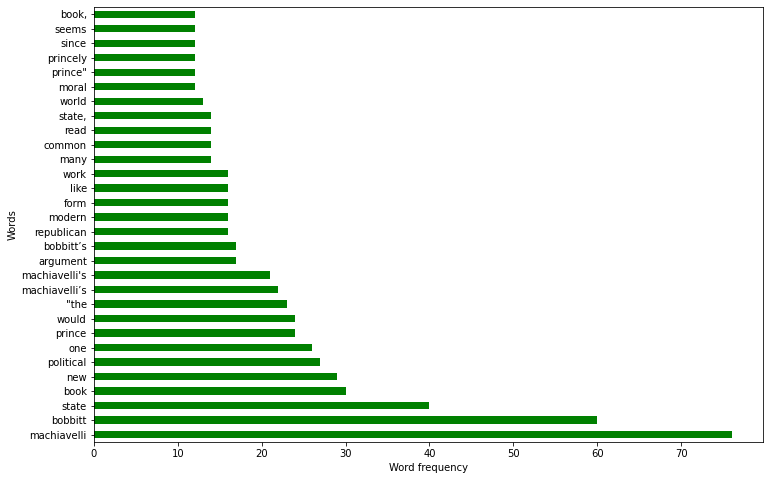

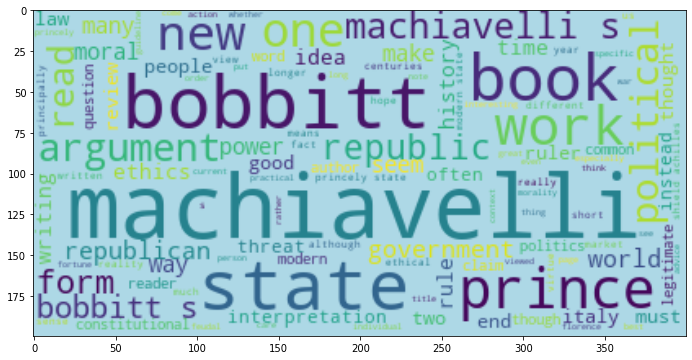

In [34]:
words_frequency(postive_reviews)

> - **'modern'**

    Indicates how people can relate this book to the modern world which is also a very great approach delivered by the author. The author concluded that Machiavelli's doctrine is relatable to the modern world in which Machiavelli's appreciation and realization of the changing constitutional order that was ongoing in Italy at that time. Phillip Bobbit states that what Machiavelli saw at that time is also happening now, where there is an  emergence of a new constitutional order which is the 'market state'.

### Negative reviews

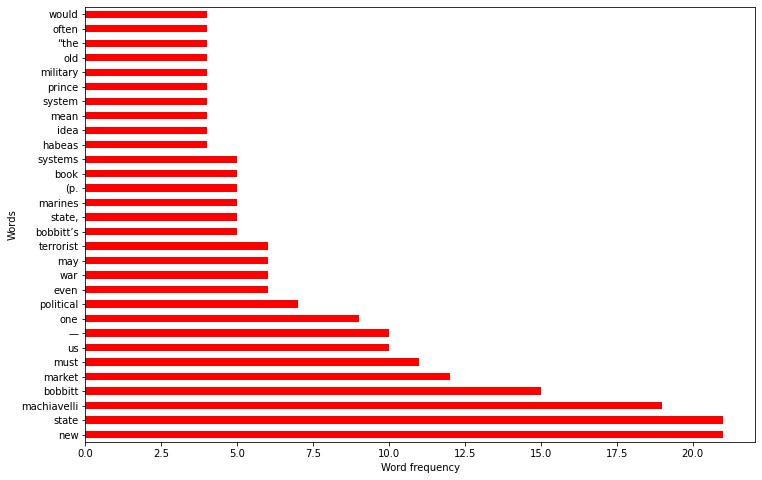

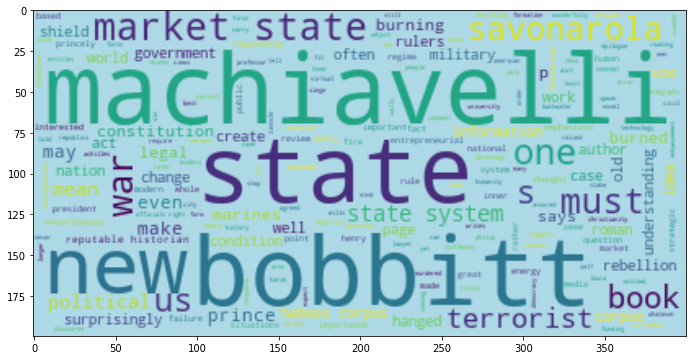

In [37]:
words_frequency(negative_reviews)

#### This is interesting. Negative reviews tend to have the word 'terrorist' in them. What are the reviewers implying by **'terrorist'**?

In [40]:
terrorist=negative_reviews[negative_reviews['reviews'].str.contains('terrorist')]
terrorist

,username,reviews,neg,neu,pos,compound,sentiment
19,Robert,"mary wills new york times review. like.""he sho...",0.177,0.691,0.132,-0.996,negative


>
        
    Looks like this particular review was not that negative or denounces the ideas conveyed by the writer. The reviewer actually praises how Phillip Bobbit writing's from the past and present are very eloquent and well delivered. He also agrees how actions taken by any state in order to preserve itself is a must. In addition the reviewer also discusssed on how Machiavelli ideas are relevant in combating terrorism in modern times.

### Neutral reviews

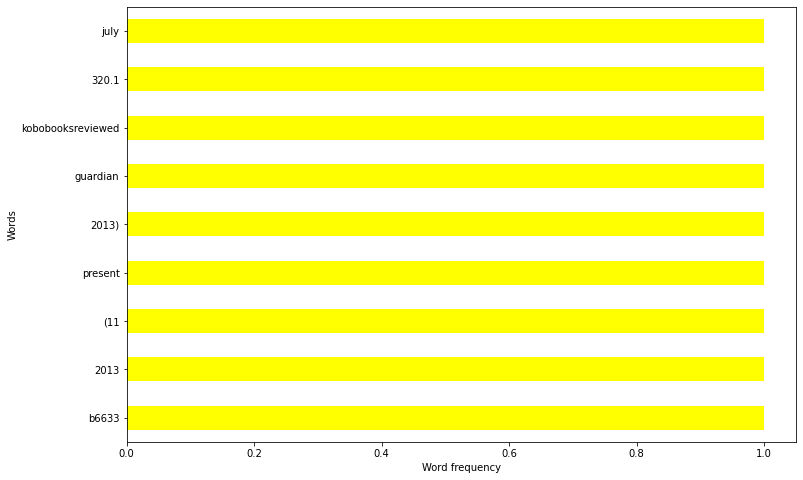

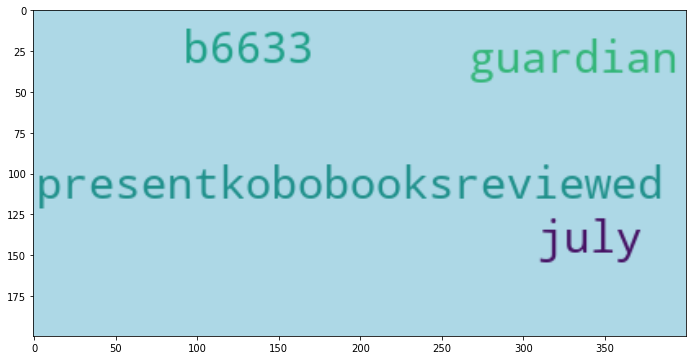

In [84]:
words_frequency(neutral_reviews)

> 

    These reviews are just gibberish